<a href="https://colab.research.google.com/github/kkokay07/GenomicClass_on_Cloud/blob/master/Genomic_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creator: Dr. KANAKA K. K.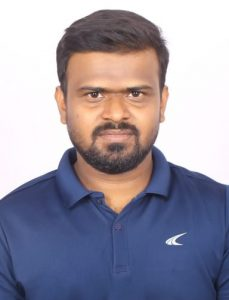PhD, ARS  ScientistSchool of Bioinformatics and Computational BiologyICAR-Indian Institute of Agricultural Biotechnology, Ranchi, Jharkhand.Spy on me at :)  [Google Scholar](https://scholar.google.com/citations?hl=en&user=0dQ7Sf8AAAAJ&view_op=list_works);    [ResearchGate](https://www.researchgate.net/profile/Kanaka-K-K/research);    [Website](https://iiab.icar.gov.in/staff/dr-kanaka-k-k/)

# **Table of Contents (Covered Sections)**| Section | Title                                              | What you learn to estimate / do                                            | Section link                           || ------- | -------------------------------------------------- | -------------------------------------------------------------------------- | -------------------------------------- || 0.1     | Setting up environment                             | Installing HiBLUP, uploading demo data, folder structure, running commands | [Link](#Section-0.1:-Setting-up-environment) || 0.2     | Basics of BLUP (with example)                      | Concept of BLUP, simple mixed model, EBV vs phenotype                      | [Link](#Section-0.2:-Basics-of-BLUP-(with-example))       || 1       | Pedigree-based Numerator Relationship Matrix (NRM) | Additive numerator relationship matrix and its inverse                     | [Link](#Section-1:-Pedigree-based-Numerator-Relationship-Matrix-(NRM))                 || 2       | Genomic Relationship Matrix (GRM)                  | Genomic relationship matrix and its inverse                                | [Link](#Section-2:-Genomic-Relationship-Matrix-(GRM))                 || 3       | Combined H-Matrix for SSGBLUP                      | Single-step H-matrix integrating pedigree and genomics                     | [Link](#Section-3:-Combined-H-Matrix-for-SSGBLUP)            || 4       | Heritability estimation and variance components    | Variance components and heritability (PBLUP, GBLUP, ssGBLUP)               | [Link](#Section-4:-Heritability-estimation-and-variance-components)        || 5       | Mixed Model Equations (MME) – direct solution      | Breeding values and variance component interpretation                      | [Link](#Section-5:-Mixed-Model-Equations-(MME)-%E2%80%93-direct-solution)                 || 6       | Multi-trait analysis                               | Genetic correlations and multi-trait breeding values                       | [Link](#Section-6:-Multi-trait-analysis)          || 7.1     | Repeated measures GBLUP                            | Permanent environment effects and repeatability                            | [Link](#Section-7.1:-Repeated-measures-GBLUP-(Repeatability))     || 7.2     | Optimal mating design (OCS)                        | Optimal contribution selection and mating decisions                        | [Link](#Section-7.2:-Optimal-mating-design-(OCS))               |

## Section 0.1: Setting up environment

This cell mounts Google Drive and creates a dedicated project folder named
*Genomic_Selection_WinterSchool_IIAB*.
All software, input data, intermediate files, and results generated in this notebook will be stored in this folder to ensure persistence across sessions and easy sharing.

In [ ]:
# ============================================================
# Step 1: Mount Google Drive
# This allows persistent storage across Colab sessions
# ============================================================

from google.colab import drive
drive.mount('/content/drive')


# ============================================================
# Step 2: Define and create project working directory
# All software, data, and outputs will be saved here
# ============================================================

PROJECT_DIR = "/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB"

!mkdir -p $PROJECT_DIR
%cd $PROJECT_DIR


# ============================================================
# Step 3: Confirm working directory
# ============================================================

import os
print("Current working directory:")
print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB
Current working directory:
/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB


In [51]:
# ============================================================
# If runtime disconnects in between, Mount Google Drive again using this code
# ============================================================

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set up HiBLUP working environment

In [ ]:
# ============================================================
# Step 4: Create directory structure for HiBLUP analysis
# ============================================================

HIBLUP_DIR = os.path.join(PROJECT_DIR, "HiBLUP")
DATA_DIR   = os.path.join(HIBLUP_DIR, "data")
BIN_DIR    = os.path.join(HIBLUP_DIR, "bin")
OUT_DIR    = os.path.join(HIBLUP_DIR, "results")

!mkdir -p $HIBLUP_DIR
!mkdir -p $DATA_DIR
!mkdir -p $BIN_DIR
!mkdir -p $OUT_DIR

print("HiBLUP directory structure created:")
print(" - Software:", BIN_DIR)
print(" - Input data:", DATA_DIR)
print(" - Results:", OUT_DIR)


HiBLUP directory structure created:
 - Software: /content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP/bin
 - Input data: /content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP/data
 - Results: /content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP/results


## Install HiBLUP
HiBLUP is a command-line tool for BLUP, GBLUP, and ssGBLUP analyses in genomic selection.

In [ ]:
# ============================================================
# Step 5: Upload HiBLUP binary manually
# ============================================================

from google.colab import files
import os

# Ensure we are in the HiBLUP bin directory
%cd $BIN_DIR

print("Upload the HiBLUP Linux binary (e.g., hiblup or hiblup_linux):")
uploaded = files.upload()

# Make uploaded file executable
for fname in uploaded.keys():
    os.chmod(fname, 0o755)
    print(f"Executable permission set for: {fname}")

# Verify HiBLUP
!ls -lh


/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP/bin
Upload the HiBLUP Linux binary (e.g., hiblup or hiblup_linux):


Saving hiblup_1.6.0_linux_x86_64_20250929.tar.gz to hiblup_1.6.0_linux_x86_64_20250929.tar.gz
Executable permission set for: hiblup_1.6.0_linux_x86_64_20250929.tar.gz
total 14M
-rwx------ 1 root root   0 Feb 10 05:26 hiblup
-rwx------ 1 root root 14M Feb 10 05:30 hiblup_1.6.0_linux_x86_64_20250929.tar.gz


In [ ]:
# ============================================================
# Step 6: Extract HiBLUP archive
# ============================================================

# Ensure we are in the HiBLUP bin directory
%cd $BIN_DIR

# Extract the archive
!tar -xvzf hiblup_1.6.0_linux_x86_64_20250929.tar.gz

# List files after extraction
!ls -lh

/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP/bin
bin/hiblup
total 14M
drwx------ 2 root root 4.0K Feb 10 05:31 bin
-rwx------ 1 root root    0 Feb 10 05:26 hiblup
-rwx------ 1 root root  14M Feb 10 05:30 hiblup_1.6.0_linux_x86_64_20250929.tar.gz


In [ ]:
!tar -xvzf hiblup_1.6.0_linux_x86_64_20250929.tar.gz


bin/hiblup


In [ ]:
# Set executable permission
!chmod +x bin/hiblup

In [ ]:
!./bin/hiblup --help

#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#

Usage: ./bin/hiblup [Function] [Option]

Function:
  --single-trait              to implement single trait model.
  --multi-trait,--multi-traits
                              to implement multiple traits model.
  --mme                       to solve the mixed model equation with provided variance components.
  --make-xrm                  to construct and output relationship matrix.
  --trans-xrm                 to transform file format of relationship matrix.
  --trans-geno                to convert genotype in PLINK binary files (*.fam, *.bim, 

# Upload demo data

In [20]:
from google.colab import files

# Move to HiBLUP data directory
%cd $DATA_DIR

print("Upload ALL files extracted from demo.zip:")
uploaded = files.upload()

print("\nUploaded files:")
for f in uploaded:
    print(f)


/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP/data
Upload ALL files extracted from demo.zip:


Saving 3.0 Repeat trait model.sh to 3.0 Repeat trait model.sh
Saving 4.0 Multiple traits model.sh to 4.0 Multiple traits model.sh
Saving 6.0 Genomic mating.sh to 6.0 Genomic mating.sh
Saving demo.bim to demo.bim
Saving demo.fam to demo.fam
Saving demo.phe to demo.phe
Saving demo.repeat.phe to demo.repeat.phe
Saving id.filter.txt to id.filter.txt
Saving snp.filter.txt to snp.filter.txt
Saving snp.weight.txt to snp.weight.txt
Saving 1.1 PRM.sh to 1.1 PRM.sh
Saving 1.2 GRM.sh to 1.2 GRM.sh
Saving 1.3 HRM.sh to 1.3 HRM.sh
Saving 2.1 Single trait PBLUP.sh to 2.1 Single trait PBLUP.sh
Saving 2.2 Single trait GBLUP_rrBLUP.sh to 2.2 Single trait GBLUP_rrBLUP.sh
Saving 2.3 Single trait SSBLUP.sh to 2.3 Single trait SSBLUP.sh
Saving 5.0 Solve MME.sh to 5.0 Solve MME.sh
Saving demo.bed to demo.bed
Saving demo.ped to demo.ped
Saving demo.snpeff to demo.snpeff

Uploaded files:
3.0 Repeat trait model.sh
4.0 Multiple traits model.sh
6.0 Genomic mating.sh
demo.bim
demo.fam
demo.phe
demo.repeat.phe
id.

# Understanding demo phenotype and genotype file formats

In [21]:
import pandas as pd

phe = pd.read_csv("demo.phe", sep=r"\s+", header=None)
phe.head()


,0,1,2,3,4,5,6,7,8,9
0,id,sex,season,day,bornweight,location,dam,T1,T2,T3
1,IND1001,Male,Winter,92,1.2,l32,IND0921,4.76582022911475,-3.6176788560136,24.4309950025418
2,IND1002,Male,Spring,88,2.7,l36,IND0921,12.4097715906115,10.6740955422296,20.7120836359468
3,IND1003,Male,Spring,91,1,l17,IND0968,4.85449880306195,0.602879070640462,17.4291590558733
4,IND1004,Male,Autumn,93,1,l37,IND0968,33.2216999796794,18.1082437974961,22.665404399452


# What each column means in demo.phe:
| Column index | Column name  | Meaning                             | Role in HiBLUP                                        |
| ------------ | ------------ | ----------------------------------- | ----------------------------------------------------- |
| 0            | `id`         | Unique animal identifier            | **Key column** linking phenotype to pedigree/genotype |
| 1            | `sex`        | Sex of the animal (Male/Female)     | Fixed effect                                          |
| 2            | `season`     | Season of measurement or birth      | Fixed effect                                          |
| 3            | `day`        | Day of measurement (or age in days) | Covariate                                             |
| 4            | `bornweight` | Birth weight                        | Covariate or trait (depending on model)               |
| 5            | `location`   | Farm / location code                | Fixed effect                                          |
| 6            | `dam`        | Dam (mother) ID                     | Optional fixed or random effect                       |
| 7            | `T1`         | Trait 1 (phenotype)                 | **Response variable**                                 |
| 8            | `T2`         | Trait 2 (phenotype)                 | Response variable                                     |
| 9            | `T3`         | Trait 3 (phenotype)                 | Response variable                                     |


## Section 0.2: Basics of BLUP (with example)

# Bit about BLUP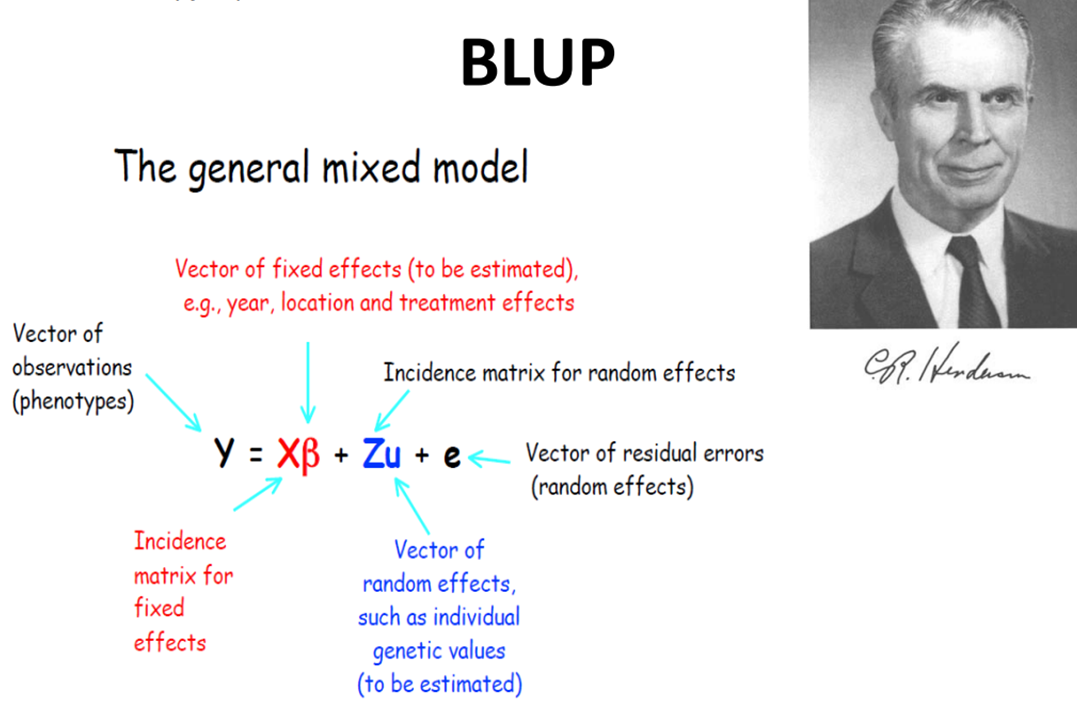

# Find NRM (Its written as A)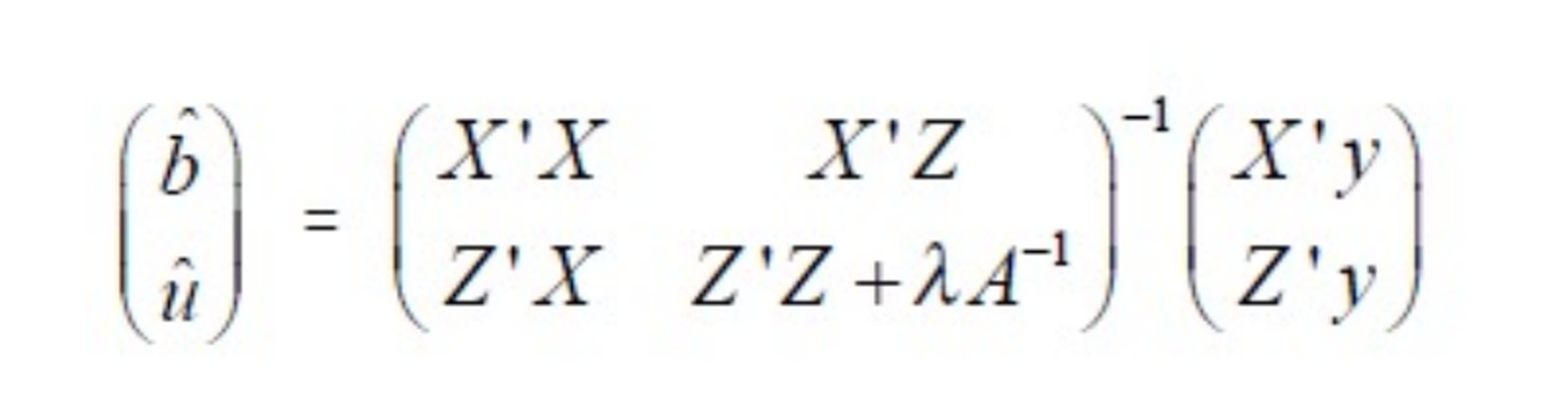

# A quick example of BLUP in action.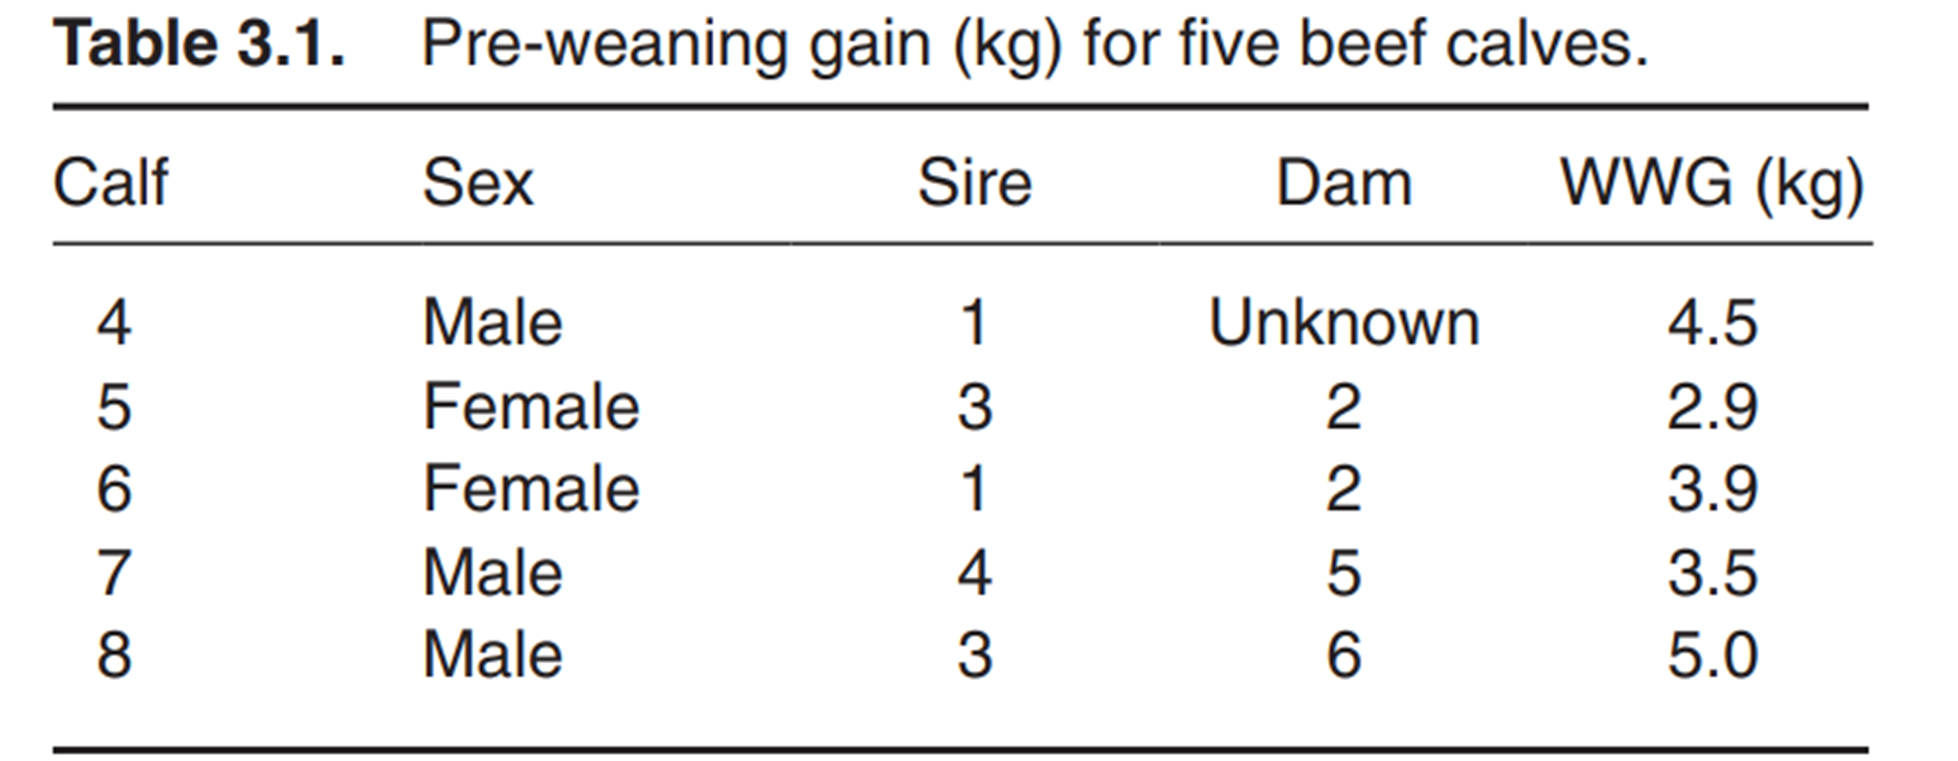

# Solving BLUP**Step 1: Find X, X' and X'X**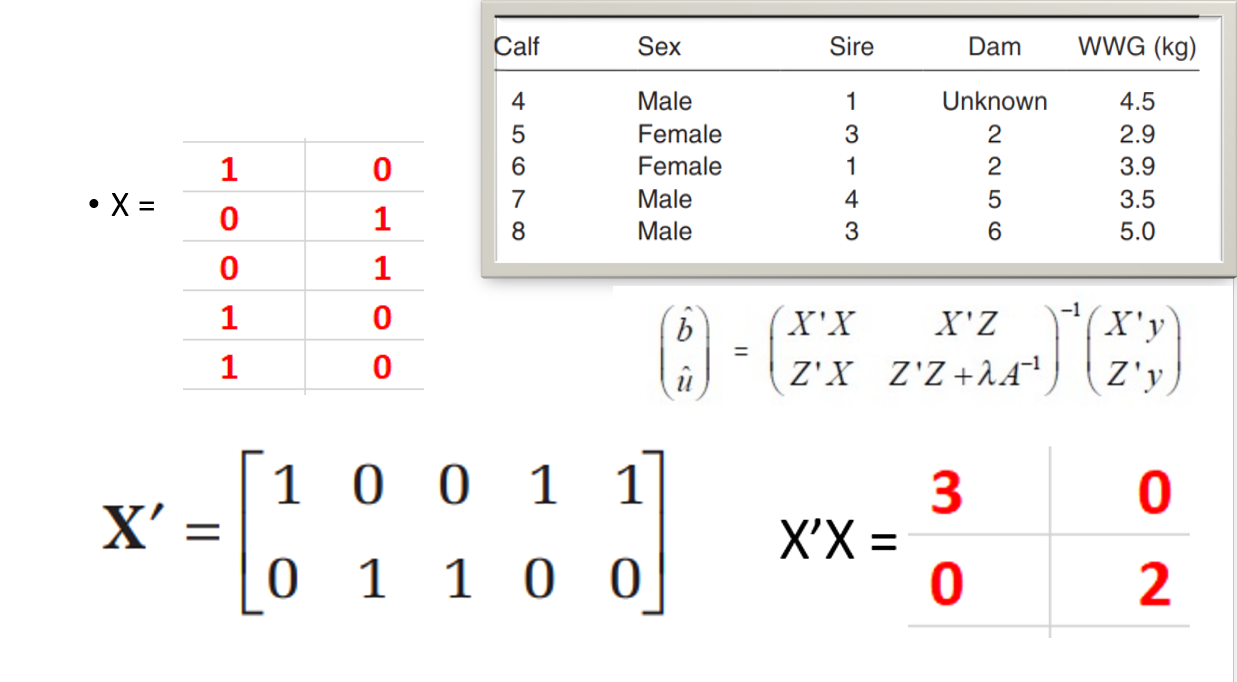

**Step 2: Designing Z, Z', Z'Z and Fetching y**: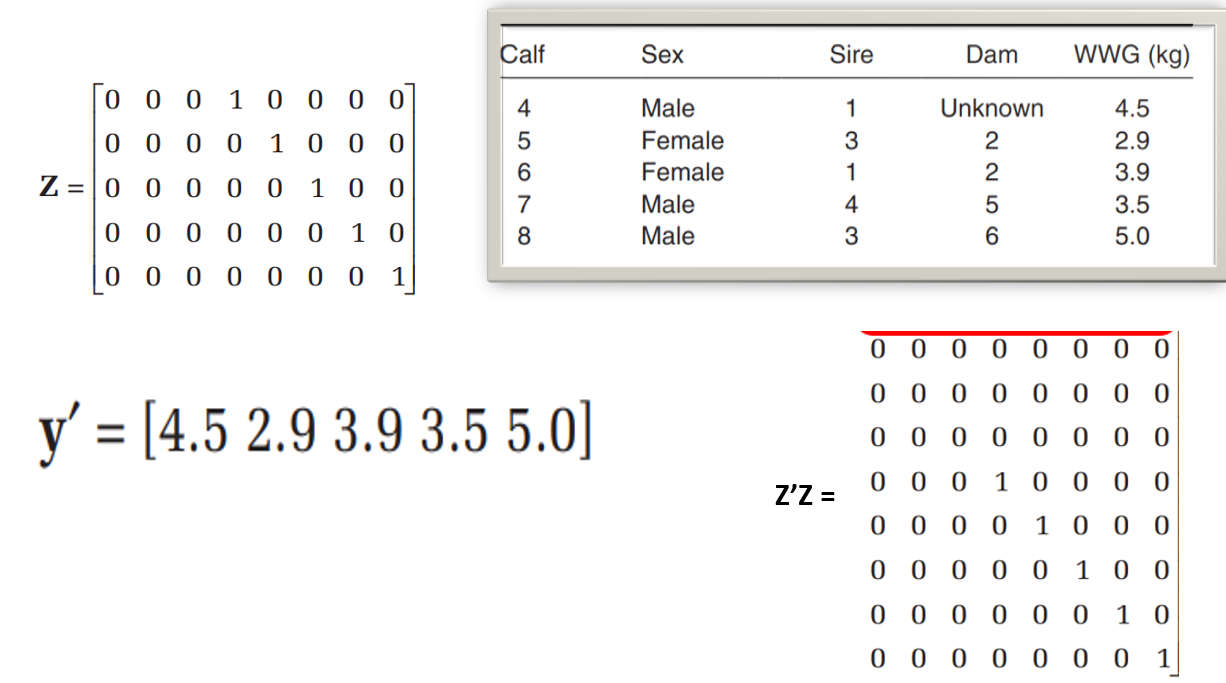

**Step 3: Calculating X'Z and Z'X**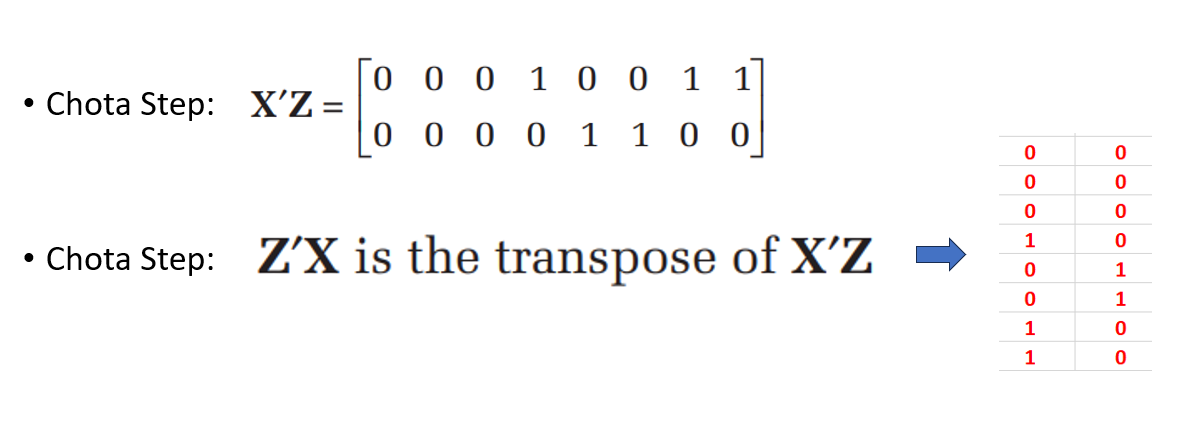

**Step 4: Stacking everything**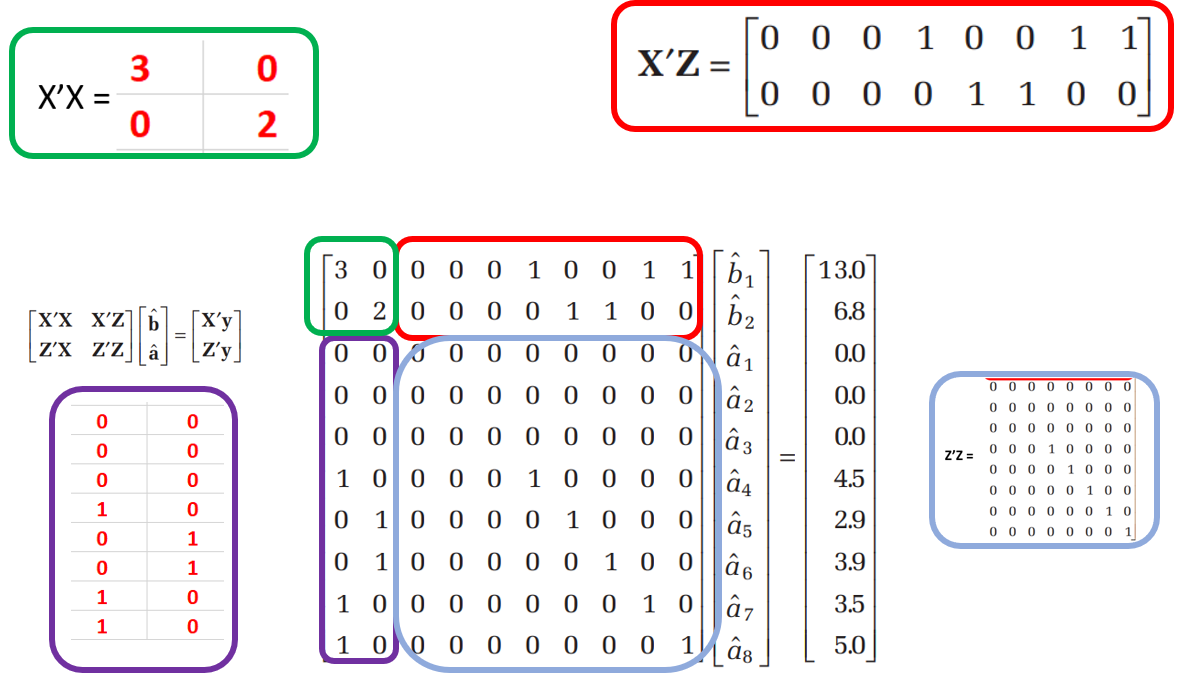

**Step 5: Now the NRM part** Understand it roughly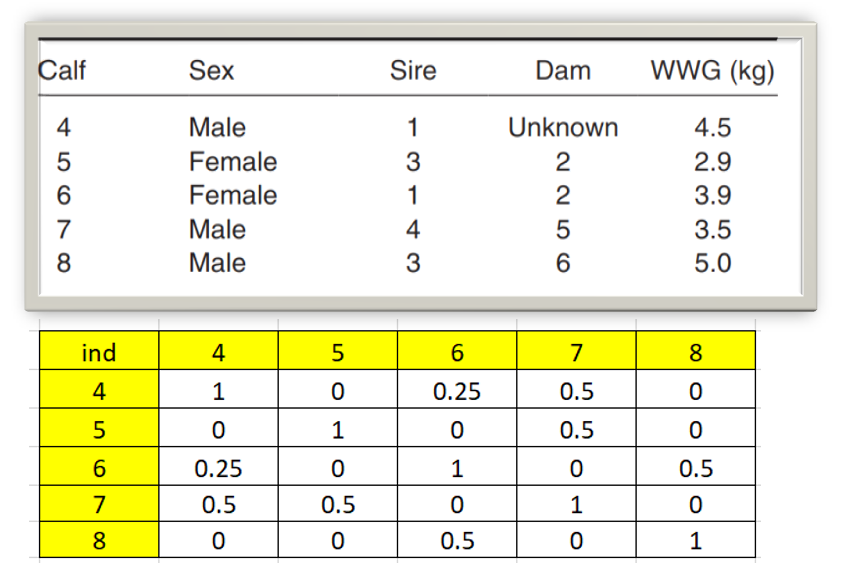

**Step 6: Lets inverse A**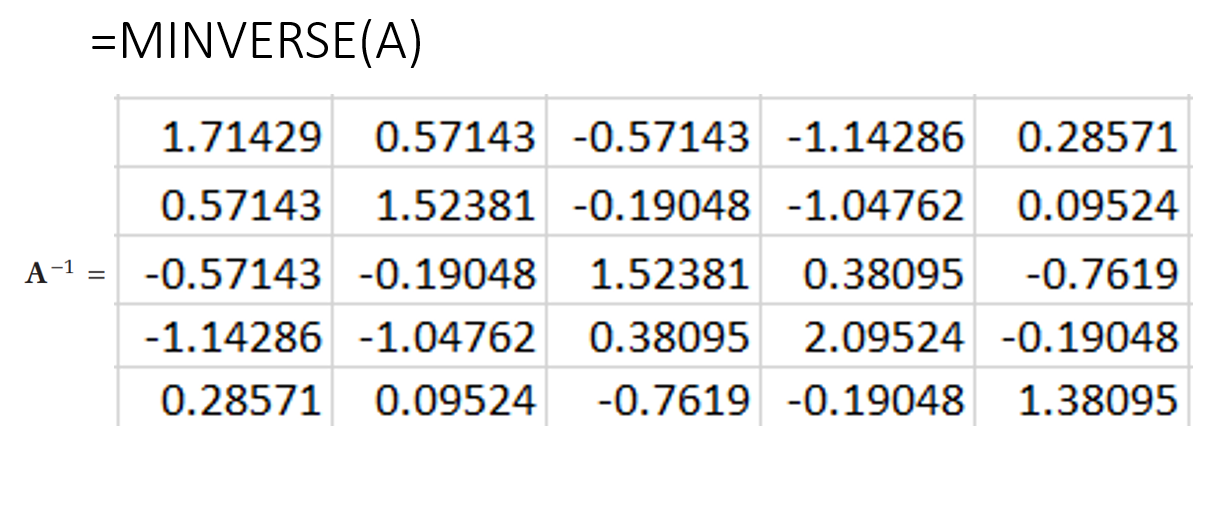

**Step 7: Lets multiply all**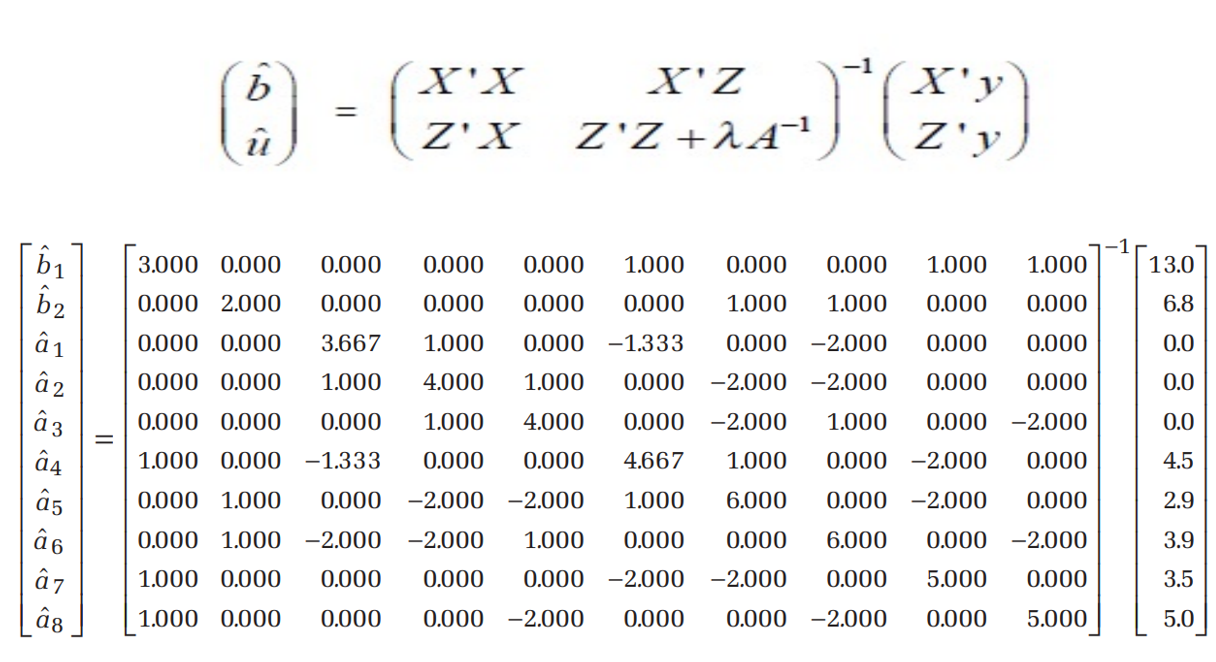

## Lambda (λ) in BLUP

Definition:

* `λ = σ²ₑ / σ²ₐ`
where σ²ₑ = residual variance, σ²ₐ = additive genetic variance

* Role in MME: `λA⁻¹` penalizes breeding values in the mixed model equations

Effect on EBVs:
* Larger λ → stronger shrinkage of EBVs (Low h² → large λ → strong environmental noise)
* Smaller λ → EBVs closer to phenotypes (High h² → small λ → strong genetic signal)

Practical estimation: λ is usually estimated by REML or derived from known h²

**Results of example: Finally!**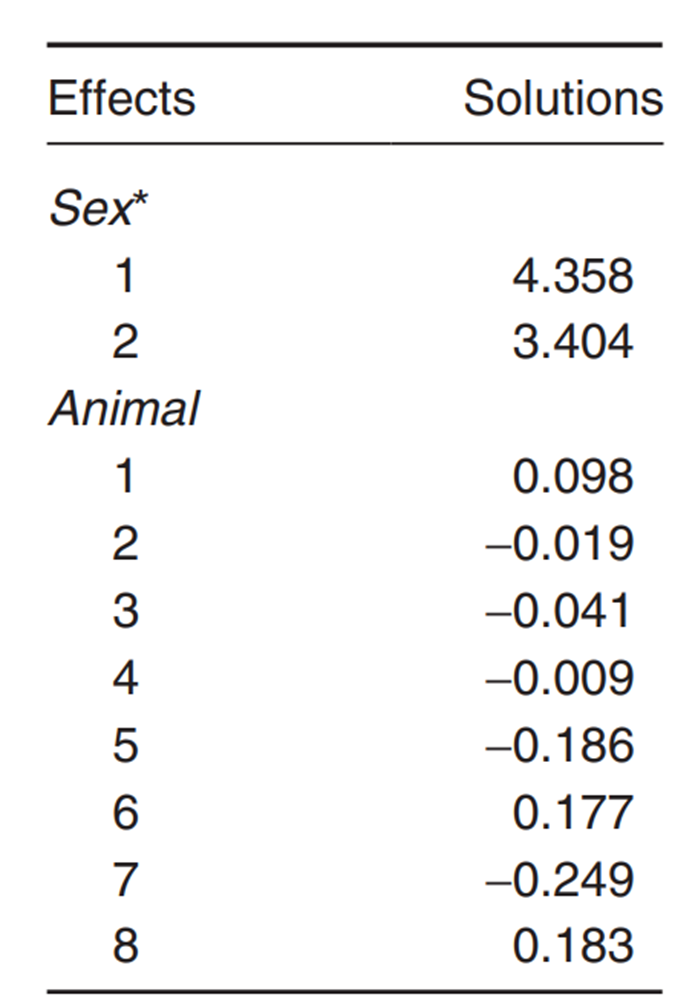

<a id="section-1-nrm"></a>
## Section 1: Pedigree-based Numerator Relationship Matrix (NRM)

In [29]:
!pwd
!ls -lh

/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP
total 12K
drwx------ 3 root root 4.0K Feb 10 05:36 bin
drwx------ 2 root root 4.0K Feb 10 05:44 data
drwx------ 2 root root 4.0K Feb 10 05:18 results


In [52]:
%cd /content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP

/content/drive/MyDrive/Genomic_Selection_WinterSchool_IIAB/HiBLUP


In [38]:
# ============================================================
# Section 1.1: Construct additive numerator relationship matrix
# ============================================================

!./bin/bin/hiblup \
  --make-xrm \
  --pedigree data/demo.ped \
  --add \
  --thread 4 \
  --out results/demo


#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 06:13:45 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --make-xrm \
  --pedigree data/demo.ped \
  --add \
  --thread 4 \
  --out results/demo 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo.log].

Loading pedigree file ...
1500 unique individuals have been detected in file [data/demo.ped].

Derive PA matrix ...
[=============================================] 100% :00s<00m:00s] 
Writing PA matrix into file ... 
1500 individuals has been saved in the file [resu

In [39]:
!ls -lh results

total 4.4M
-rw------- 1 root root 1.1K Feb 10 06:13 demo.log
-rw------- 1 root root 4.3M Feb 10 06:13 demo.PA.bin
-rw------- 1 root root  12K Feb 10 06:13 demo.PA.id


# Importance of the Numerator Relationship Matrix (NRM)

* Forms the core covariance structure for pedigree-based BLUP (PBLUP) models

* Allows prediction of breeding values for animals without phenotypes using information from relatives

* Properly accounts for additive genetic relationships among individuals

* Controls bias in genetic evaluation caused by family structure and selection

* Adjusts genetic variances for inbreeding automatically through diagonal elements

* Provides the pedigree-based foundation for advanced models such as single-step GBLUP

* Enables fair comparison of genetic merit across generations and management groups

<a id="section-2-grm"></a>
## Section 2: Genomic Relationship Matrix (GRM)

In [43]:
# ============================================================
# Section 2: Construct Genetic Relationship Matrix (GRM) using SNPs
# ============================================================

!./bin/bin/hiblup \
  --make-xrm \
  --bfile data/demo \
  --add \
  --step 100000 \
  --thread 4 \
  --out results/demo

#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 06:57:35 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --make-xrm \
  --bfile data/demo \
  --add \
  --step 100000 \
  --thread 4 \
  --out results/demo 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo.log].

Loading genotype file ...
800 individuals have been detected in file [data/demo.fam].
1000 markers have been detected in file [data/demo.bim].

The selected method for GRM: Su GS, et al. DOI:10.1371/journal.pone.0045293
Calculate allele frequency for 1000

<a id="section-3-h-matrix"></a>
## Section 3: Combined H-Matrix for SSGBLUP

In [47]:
# ============================================================
# Construct Hybrid additive relationship matrix with SNP information
# ============================================================
!./bin/bin/hiblup \
  --make-xrm \
  --pedigree data/demo.ped \
  --bfile data/demo \
  --alpha 0.05 \
  --add \
  --step 100000 \
  --thread 4 \
  --out results/demo

#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:06:40 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --make-xrm \
  --pedigree data/demo.ped \
  --bfile data/demo \
  --alpha 0.05 \
  --add \
  --step 100000 \
  --thread 4 \
  --out results/demo 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo.log].

Loading pedigree file ...
1500 unique individuals have been detected in file [data/demo.ped].
Loading genotype file ...
800 individuals have been detected in file [data/demo.fam].
1000 markers have been detect

<a id="section-4-heritability"></a>
## Section 4: Heritability estimation and variance components

#  **Heritability estimation and variance components using PBLUP**

In [57]:
# ============================================================
# Single-trait PBLUP analysis using HiBLUP
# ============================================================

!./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 6,7 \
  --pedigree data/demo.ped \
  --vc-method AI \
  --add \
  --dom \
  --threads 4 \
  --out results/demo

#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:13:50 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 6,7 \
  --pedigree data/demo.ped \
  --vc-method AI \
  --add \
  --dom \
  --threads 4 \
  --out results/demo 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo.log].

Loading phenotype file ...
500 individuals have been detected in file [data/demo.phe].
Loading pedigree file ...
1500 unique individuals ha

## Interpretation of Estimated Variance Components and Heritability

##**Variance components**

* **Location variance** = 29.72 (SE = 19.23): Differences among locations explain a noticeable but moderate amount of variation. The relatively large standard error indicates uncertainty, but location still contributes meaningfully to trait variation.

* **Dam variance** = 46.41 (SE = 73.47): Maternal effects are estimated to be moderate in magnitude, but the very large standard error shows this estimate is unreliable. The high p-value (0.53) indicates that maternal effects are not statistically significant in this dataset.

* **Additive genetic variance (PA)** = 70.04 (SE = 44.08): This is the most important genetic component. About 31.7% of the total phenotypic variance is explained by additive genetic effects, indicating moderate heritability and good potential response to selection.

* **Dominance variance (PD)** ≈ 0 (7.13e-06, SE = 325.64): Dominance effects are essentially zero. This means dominance does not contribute measurably to variation for this trait.

* **Residual variance (e)** = 74.63 (SE = 219.47): Residual variance is the largest component, showing that environmental effects and unexplained noise dominate the trait expression. The large SE reflects limited precision due to sample size.

## **Heritability estimates**

* **Location h²** = 0.135 (SE = 0.077, p = 0.081): About 13.5% of the variation is associated with location effects, borderline but not statistically significant.

* **Dam h²** = 0.210 (SE = 0.331, p = 0.525): Maternal contribution is uncertain and not significant.

* **Additive genetic h² (PA)** = 0.317 (SE = 0.198, p = 0.109): Roughly 32% of the phenotypic variation is genetically inherited through additive effects.
Although not statistically significant at the 5% level, the magnitude suggests meaningful genetic control.

* **Dominance h²** ≈ 0: Confirms dominance effects are negligible.

* **Residual proportion** = 0.338: About 34% of variation is unexplained by the model.

## **Interpretation of Fixed Effects and Covariates**
**Estimated coefficients**

* Overall mean (mu) = 46.56 (SE = 6.76): Average trait value after adjusting for all effects.

* sex_Male = −20.12 (SE = 1.47): Male animals have trait values about 20 units lower than the reference sex.
This effect is large and highly significant.

* season_Spring = −21.31 (SE = 1.61): Spring season reduces the trait by about 21 units relative to the reference season.

* season_Summer = −11.22 (SE = 1.57): Summer has a moderate negative effect.

* season_Winter = −10.40 (SE = 1.64): Winter also reduces the trait compared to the reference season. Effect is very small and not significant.

* bornweight = 1.09 (SE = 0.92): Each unit increase in birth weight increases the trait by about 1.1 units, but the effect is only marginally significant.

## **Analysis of Variance (ANOVA) Interpretation**

* Sex (F = 678.2, p < 2e-16): Sex has an extremely strong and highly significant effect.

* Season (F = 121.96, p < 2e-16): Seasonal differences are also very strong and highly significant.

* Day (p = 0.29): No significant effect.

* Bornweight (p = 0.08): Weak, borderline effect.

## **Overall biological interpretation**

* The trait shows moderate additive genetic control (h² ≈ 0.32), meaning genetic selection should be effective.

* Dominance effects are absent, so simple additive models are sufficient.

* Environmental factors such as sex and season have very strong effects and must be corrected in genetic evaluation.

* Large residual variance indicates scope for improving management or data quality.

## **Key takeaway form this section**

These results indicate that genetic improvement through selection is feasible, but accurate adjustment for major environmental effects is essential to avoid biased breeding value estimates.

#  **Heritability estimation and variance components using GBLUP**

In [60]:
# ============================================================
# Single-trait GBLUP: variance components and heritability
# ============================================================

!./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 6,7 \
  --bfile data/demo \
  --vc-method AI \
  --add \
  --dom \
  --threads 4 \
  --out results/demo_gblup

#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:29:37 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 6,7 \
  --bfile data/demo \
  --vc-method AI \
  --add \
  --dom \
  --threads 4 \
  --out results/demo_gblup 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo_gblup.log].

Loading phenotype file ...
500 individuals have been detected in file [data/demo.phe].
Loading genotype file ...
800 individuals have 

## **Comparison of Heritability Estimates: PBLUP vs GBLUP (Same Trait& Same Effects)**

| Component                        | PBLUP h²     | GBLUP h²    | Interpretation                                                                                                     |
| -------------------------------- | ------------ | ----------- | ------------------------------------------------------------------------------------------------------------------ |
| Location                         | 0.1346       | 0.0294      | Location effects explain more variation in PBLUP; genomic relationships absorb part of this variation in GBLUP     |
| Dam (maternal)                   | 0.2102       | 0.0364      | Maternal effects are inflated in PBLUP but largely reduced in GBLUP due to better partitioning of genetic variance |
| Additive genetic                 | 0.3172 (PA)  | 0.5177 (GA) | GBLUP captures more additive genetic variance by using realized genomic relationships                              |
| Dominance genetic                | ~0.0000 (PD) | 0.1957 (GD) | Dominance variance is negligible in PBLUP but detectable in GBLUP                                                  |
| Residual                         | 0.3380       | 0.2208      | Residual variance is reduced in GBLUP, indicating improved model fit                                               |
| Total explained genetic variance | ~0.32        | ~0.71       | GBLUP explains substantially more heritable variation                                                              |

## **Note:**
For the same trait and model structure, GBLUP provides a more precise and biologically realistic decomposition of genetic variance than PBLUP, leading to higher and more reliable heritability estimates. **This leads to HIGHER SELECTION ACCURACY!** --> **MORE GENETIC GAIN or RESPONSE**.


## **Heritability estimation and variance components using ssGBLUP**

In [61]:
# ============================================================
# Single-Step GBLUP (ssGBLUP): pedigree + genomic information
# ============================================================

!./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 6,7 \
  --bfile data/demo \
  --pedigree data/demo.ped \
  --add \
  --dom \
  --threads 4 \
  --out results/demo_ssgblup

#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:35:42 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 6,7 \
  --bfile data/demo \
  --pedigree data/demo.ped \
  --add \
  --dom \
  --threads 4 \
  --out results/demo_ssgblup 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo_ssgblup.log].

Loading phenotype file ...
500 individuals have been detected in file [data/demo.phe].
Loading pedigree file ...
1500 un

## **Comparison of Variance Components and Heritability**
(Same trait, same fixed effects and covariates)
| Component            | PBLUP h²     | GBLUP h²    | ssGBLUP h²  | Interpretation                                                                                                              |
| -------------------- | ------------ | ----------- | ----------- | --------------------------------------------------------------------------------------------------------------------------- |
| Location             | 0.1346       | 0.0294      | 0.0282      | Environmental location effect is inflated in PBLUP; genomic information absorbs part of this variation in GBLUP and ssGBLUP |
| Dam (maternal)       | 0.2102       | 0.0364      | 0.0339      | Maternal effects appear large in PBLUP but are reduced when genomic relationships are used                                  |
| Additive genetic     | 0.3172 (PA)  | 0.5177 (GA) | 0.5634 (HA) | Additive heritability increases from PBLUP to GBLUP and is highest in ssGBLUP                                               |
| Dominance genetic    | ~0.0000 (PD) | 0.1957 (GD) | 0.1771 (HD) | Dominance variance is detected only when genomic data are included                                                          |
| Residual             | 0.3380       | 0.2208      | 0.1974      | Residual variance decreases as genomic information improves model fit                                                       |
| Total genetic signal | Moderate     | High        | Highest     | ssGBLUP provides the most complete use of genetic information                                                               |


**Key reasons ssGBLUP shows higher h²**

* Uses both genotyped and non-genotyped animals: ssGBLUP borrows information from genotyped animals through SNPs and propagates it to non-genotyped relatives through pedigree links. This increases the effective amount of genetic information in the analysis.

* Better separation of genetic and environmental variance: In PBLUP, some genetic variation is incorrectly absorbed by dam and location effects.
ssGBLUP reallocates this variance back to the additive genetic component.

* More accurate relationship structure (H matrix): The H matrix uses realized genomic relationships where available and expected pedigree relationships elsewhere. This reduces noise in genetic covariance estimation.

* Reduced residual variance: In your results, residual variance is lowest in ssGBLUP. When unexplained noise decreases, the proportion of variance attributed to genetics increases.

* Improved handling of Mendelian sampling: PBLUP cannot capture within-family genetic differences. ssGBLUP captures these differences for genotyped animals and propagates them across the pedigree.

* Stabilization of variance estimates: GBLUP alone may underestimate genetic variance when genotype sample size is limited.ssGBLUP stabilizes estimates by anchoring genomic relationships to pedigree structure.

<a id="section-6-multitrait"></a>
## Section 6: Multi-trait analysis

# **Multi-trait variance component estimation (Genetic correlations)**


In [62]:
# ============================================================
# Multi-trait GBLUP: variance components and genetic correlations
# ============================================================

!./bin/bin/hiblup \
  --multi-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 9 10 \
  --dcovar 2,3 0 2 \
  --qcovar 4,5 5 4 \
  --rand 6,7 7 0 \
  --bfile data/demo \
  --add \
  --dom \
  --threads 4 \
  --out results/demo_multitrait


#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:42:25 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --multi-trait \
  --pheno data/demo.phe \
  --pheno-pos 8 9 10 \
  --dcovar 2,3 0 2 \
  --qcovar 4,5 5 4 \
  --rand 6,7 7 0 \
  --bfile data/demo \
  --add \
  --dom \
  --threads 4 \
  --out results/demo_multitrait 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo_multitrait.log].

Loading phenotype file ...
500 individuals have been detected in file [data/demo.phe].
Loading genotype file ...
800 individual

## **Interpretation of genetic correlations (additive genetic effects)**

Genetic correlations describe the extent to which the same genes influence different traits.

**Additive genetic correlations (GA)**:
* T1–T2: r = 0.78 (p = 6.8e-12): This is a strong and highly significant positive genetic correlation. Genes increasing T1 also tend to increase T2.nSelection for T1 will strongly improve T2 as a correlated response.

* T1–T3: r = 0.52 (p = 0.23): Moderate positive correlation, but not statistically significant. There may be shared genetic control, but evidence is weak due to large SE.

* T2–T3: r = 0.14 (p = 0.73): Very weak and non-significant genetic correlation.
T2 and T3 are largely genetically independent.

**Interpretation of dominance genetic correlations (GD)**

* T1–T2: r = 0.49 (p = 0.019): Moderate and significant dominance correlation.
Indicates shared non-additive genetic effects between T1 and T2.

* T2–T3: r = 0.69 (p = 0.003): Strong dominance correlation, suggesting dominance plays an important role in joint expression of T2 and T3.

* 1–T3: r = 0.13 (p = 0.69): Weak and non-significant dominance relationship.
Dominance effects are trait-pair specific and are strongest for T2–T3.

**Interpretation of residual correlations (environmental correlations)**

All residual correlations are close to zero and non-significant

* T1–T2: 0.03

* T1–T3: ~0

* T2–T3: −0.06

This indicates that shared environment or measurement effects do not induce correlation between traits.
Observed correlations among traits are therefore primarily genetic, not environmental.

**Biological and breeding implications**

* T1 and T2 are strongly genetically connected and can be improved together.

* T3 is largely genetically independent from T2 and only weakly related to T1.

* Dominance effects are important for T2 and T3 but negligible for T1 alone.

* Environmental covariates (sex, season, day, birth weight) must be properly adjusted to avoid biased genetic parameter estimates.

## **Key takeaway**

Multi-trait GBLUP reveals that trait correlations are mainly genetic rather than environmental, with strong additive genetic linkage between T1 and T2, and important dominance relationships involving T2 and T3.

<a id="section-7-1-repeatability"></a>
## Section 7.1: Repeated measures GBLUP (Repeatability)

# **GBLUP with repeated measures (Permanent Environment & Repeatability)**

In [63]:
# ============================================================
# Single-trait GBLUP with repeated measures (permanent environment)
# ============================================================

!./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.repeat.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 1,6,7 \
  --bfile data/demo \
  --add \
  --threads 4 \
  --out results/demo_repeat_gblup


#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:49:37 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --single-trait \
  --pheno data/demo.repeat.phe \
  --pheno-pos 8 \
  --dcovar 2,3 \
  --qcovar 4,5 \
  --rand 1,6,7 \
  --bfile data/demo \
  --add \
  --threads 4 \
  --out results/demo_repeat_gblup 

Program will be running on up to 4 threads.
The log will be recorded in file [results/demo_repeat_gblup.log].

Loading phenotype file ...
1000 individuals have been detected in file [data/demo.repeat.phe].
Loading genotype file ...
800 individuals hav

## **Interpretation of permanent environment and repeatability**

Repeatability measures the consistency of repeated records of the same animal over time.
In repeated-measures GBLUP, repeatability reflects both genetic and permanent environmental effects.

---

## **Variance components contributing to repeatability**

* **Additive genetic variance (GA): h² = 0.4874 (p < 2e-16)**
  A large and highly significant proportion of variation is due to additive genetic effects.
  This indicates strong genetic control of the trait.

* **Permanent environmental variance (ID): h² = 0.0877 (p = 0.0357)**
  This component captures non-genetic, animal-specific effects that persist across repeated measurements.
  Its significance indicates that repeated records on the same animal are correlated beyond genetics.

* **Residual variance (e): h² = 0.3000 (p < 2e-16)**
  Represents temporary environmental effects and measurement error that differ between repeated records.

---

## **Repeatability estimate**

Repeatability is calculated as:

* **Repeatability = GA + ID**
* **Repeatability ≈ 0.4874 + 0.0877 = 0.575**

This indicates moderate to high consistency of repeated records for the same animal.

---

## **Interpretation of repeatability value**

* A repeatability of approximately **0.58** indicates good consistency across repeated measurements.
* Early records are reliable predictors of future performance.
* Additional records provide diminishing returns after the first few measurements.

---

## **Biological and breeding implications**

* Genetic effects are the primary driver of repeatability.
* Permanent environmental effects also contribute meaningfully to long-term performance.
* Selection decisions can be based on early records with reasonable confidence.
* Improving permanent management conditions can enhance lifetime performance.

---

## **Key takeaway**

Repeatability in this GBLUP model is mainly driven by additive genetic effects, with a significant contribution from permanent environment, resulting in moderate to high consistency of repeated records across time.

---

## **Comparison of Heritability and Repeatability**
| Aspect                | Heritability (h²)                                          | Repeatability (r)                                              |
| --------------------- | ---------------------------------------------------------- | -------------------------------------------------------------- |
| Definition            | Proportion of phenotypic variance due to additive genetics | Proportion of variance due to genetics + permanent environment |
| Variance components   | Additive genetic variance only                             | Additive genetic + permanent environmental variance            |
| Formula               | h² = GA / (GA + ID + e)                                    | r = (GA + ID) / (GA + ID + e)                                  |
| Value in your results | ≈ 0.49                                                     | ≈ 0.58                                                         |
| Interpretation        | Measures genetic control of the trait                      | Measures consistency of repeated records                       |
| Practical use         | Predicts response to selection                             | Predicts reliability of early records                          |


<a id="section-7-2-ocs"></a>
## Section 7.2: Optimal mating design (OCS)

# **Optimal Contribution Selection**

In [64]:
# ============================================================
# Optimal mating design using genomic information
# ============================================================

!./bin/bin/hiblup \
  --mating \
  --bfile data/demo \
  --score data/demo.snpeff \
  --add \
  --dom \
  --out results/demo_mating


#=============================================================#
#                    WELCOME TO USE HIBLUP                    #
#           Home: www.hiblup.com                              #
#       Software: Linux x86_64 v1.6.0 (2025-09-29 Release)    #
#     Developers: Lilin Yin, Haohao Zhang and Xiaolei Liu     #
#       Copyright (c) 2021-present. All rights reserved.      #
#=============================================================#
Analysis started: Tue Feb 10 07:58:42 2026
Hostname: b23a593c030f

Commands:
./bin/bin/hiblup \
  --mating \
  --bfile data/demo \
  --score data/demo.snpeff \
  --add \
  --dom \
  --out results/demo_mating 

Program will be running on up to 2 threads.
The log will be recorded in file [results/demo_mating.log].

Loading genotype file ...
800 individuals have been detected in file [data/demo.fam].
1000 markers have been detected in file [data/demo.bim].
Loading SNP effect file ...
1000 SNPs with additive and dominant effects have been loaded in f

In [65]:
# Display top 5 rows of optimal Contribution Selection results
!head -n 6 results/demo_mating.mating

sir	dam	g
IND0701	IND0704	0.711604
IND0701	IND0706	-1.76655
IND0701	IND0708	-1.6103
IND0701	IND0709	4.0172
IND0701	IND0712	4.7459


## **Importance of Optimal Contribution Selection (OCS) / Optimal Mating and Interpretation of Results**

* Optimal mating designs maximize **expected progeny genetic merit** while controlling the accumulation of inbreeding in the population.

* The **g value** represents the predicted genetic merit of the progeny from a specific sire–dam combination; higher values indicate more favorable expected offspring performance.

* In your results, matings such as **IND0701 × IND0712 (g = 4.75)** and **IND0701 × IND0709 (g = 4.02)** are ranked highest, indicating these crosses are expected to produce superior progeny.

* Negative g values (for example, **IND0701 × IND0706 = −1.77**) indicate unfavorable genetic combinations and should be avoided despite the individual merit of the parents.

* OCS balances **genetic gain and genetic diversity**, preventing overuse of a few top sires that would otherwise increase inbreeding.

* By incorporating **genomic information**, optimal mating captures both additive and dominance effects, allowing exploitation of favorable allele combinations and heterosis.

* Implementing OCS leads to **sustainable long-term genetic improvement**, ensuring steady gain without compromising population health.

---

## **Key takeaway**

Optimal mating moves breeding decisions from *who to select* to *who should mate with whom*, using genomic predictions to maximize gain while safeguarding genetic diversity.
